In [1]:
import torch

In [2]:
print(torch.__version__)

2.0.0+cu117


# 张量创建以及类型

## 张量创建函数： torch.tensor()  eg: torch.tensor([1,2])

In [3]:
# 通过列表创建张量
t = torch.tensor([1,2])
t

tensor([1, 2])

In [4]:
# 通过元组创建张量
torch.tensor((1,2))

tensor([1, 2])

In [5]:
# 通过数组创建张量
import numpy as np
a = np.array((1,2))
print(a)
t1 = torch.tensor(a)
t1

[1 2]


tensor([1, 2], dtype=torch.int32)

## 张量的类型
    张量和数组类似，都拥有dtype方法，可返回类型

In [6]:
# 数组类型
a.dtype

dtype('int32')

In [7]:
# 张量类型
print(t.dtype)
print(t1.dtype)

torch.int64
torch.int32


在这里，我们发现，整数型的数组默认创建int32 (整型)类型，而张量则默认创建int64 (长整型)类型。

In [8]:
np.array([1.1,2.2]).dtype

dtype('float64')

In [9]:
torch.tensor(np.array([1.1,2.2])).dtype

torch.float64

In [10]:
torch.tensor([1.1,2.2]).dtype

torch.float32

相对的，创建浮点型数组时，Array则是默认float64(双精度浮点型)，而张量默认是float32 (单精度浮点型)。

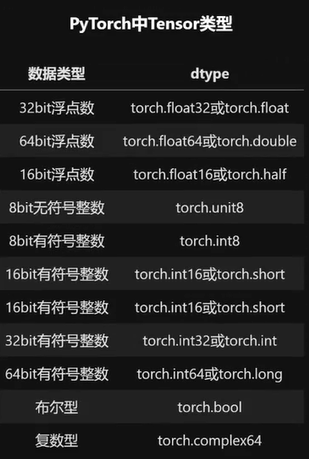

## 张量类型的转化

### 隐式转化

In [11]:
torch.tensor([1.1,2])

tensor([1.1000, 2.0000])

In [12]:
torch.tensor([1.1,2]).dtype

torch.float32

In [13]:
torch.tensor([True,2.0])

tensor([1., 2.])

### 显示转化

In [14]:
t

tensor([1, 2])

In [15]:
t.float()

tensor([1., 2.])

In [16]:
t.double()

tensor([1., 2.], dtype=torch.float64)

In [17]:
t.dtype

torch.int64

# 张量的维度与形变

## 创建高维张量

In [18]:
t1 = torch.tensor([1,2])
t1

tensor([1, 2])

In [19]:
# 使用ndim属性查看张量的维度
t1.ndim

1

In [20]:
# 使用shape查看张量的形状
t1.shape

torch.Size([2])

In [21]:
# 返回拥有多少个（n - 1）维的张量 eg 3个0维的张量
len([1,2,3])

3

In [22]:
len(t1)

2

In [23]:
# 返回总共拥有几个元素
t1.numel()

2

### 用list的list创建二维数组

In [24]:
t2 = torch.tensor([[1,2],[3,4]])
t2

tensor([[1, 2],
        [3, 4]])

#### 二维数组的形状

In [25]:
t2.ndim

2

In [26]:
t2.shape

torch.Size([2, 2])

In [27]:
t2.size()

torch.Size([2, 2])

In [28]:
len(t2) #代表t2是由两个一维的张量构成的

2

In [29]:
t2.numel()

4

### 零维张量

In [30]:
# 一维张量
t0 = torch.tensor([1])
print(t0)

# 零维张量 是一个数 是一个标量 但它又不是一个单纯的数
t = torch.tensor(1)
print(t)

tensor([1])
tensor(1)


In [31]:
t.shape

torch.Size([])

In [32]:
t.numel()

1

理解零维张量:
目前，我们可将零维张量视为拥有张量属性的单独一个数。(例如，张量可以存在GPU上，但Python原生的数偏型对象不行，但零维张量可以，尽管是零维。)从学术名称来说，Python中单独一个数是scalars (标量)，而零维的张量则是tensor。

### 高维张量

In [33]:
a1 = np.array([[1,2,3],[1,2,3]])
a1

array([[1, 2, 3],
       [1, 2, 3]])

In [34]:
a2 = np.array([[3,4,5],[3,4,5]])
a2

array([[3, 4, 5],
       [3, 4, 5]])

In [35]:
t3 = torch.tensor([a1,a2])
print(t3)

tensor([[[1, 2, 3],
         [1, 2, 3]],

        [[3, 4, 5],
         [3, 4, 5]]], dtype=torch.int32)


C:\Users\Kun\AppData\Local\Temp\ipykernel_25856\3236236227.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  t3 = torch.tensor([a1,a2])


In [36]:
print(t3.ndim)
# 包含两个，两行三列的矩阵的 张量
print(t3.shape)
print(len(t3))
print(t3.numel())

3
torch.Size([2, 2, 3])
2
12


## 张量的形变

### flatten拉平：将任意维度张量转化为一维张量（包括零维）

In [37]:
t2

tensor([[1, 2],
        [3, 4]])

In [38]:
t2.flatten()

tensor([1, 2, 3, 4])

In [39]:
t3

tensor([[[1, 2, 3],
         [1, 2, 3]],

        [[3, 4, 5],
         [3, 4, 5]]], dtype=torch.int32)

In [40]:
t3.flatten()

tensor([1, 2, 3, 1, 2, 3, 3, 4, 5, 3, 4, 5], dtype=torch.int32)

注: 如果将零维张量使用flatten,则会将其转化为一维张量。

In [41]:
t

tensor(1)

In [42]:
t.flatten()

tensor([1])

In [43]:
t.flatten().ndim

1

### reshape:任意变形

In [44]:
t1

tensor([1, 2])

In [45]:
t1.shape

torch.Size([2])

In [46]:
t1.reshape(2,1)

tensor([[1],
        [2]])

In [47]:
t1.reshape(2,1).ndim

2

In [48]:
t1.reshape(2,1).shape

torch.Size([2, 1])

In [49]:
len(t1.reshape(2,1))

2

#### 转化后生成一维张量

In [50]:
t1.reshape(2)

tensor([1, 2])

In [51]:
t1.size()

torch.Size([2])

In [52]:
t1.reshape(2).ndim

1

#### 转化后生成二维张量

In [53]:
t1

tensor([1, 2])

In [54]:
t1.reshape(1,2)

tensor([[1, 2]])

In [55]:
t1.reshape(1,2).ndim

2

#### 转化后生成三维张量

In [56]:
t1.reshape(1,1,2).shape

torch.Size([1, 1, 2])

In [57]:
t1.reshape(1,2,1)

tensor([[[1],
         [2]]])

In [58]:
# 注意转化过程维度的变化
t1.reshape(1,2,1).ndim

3

# 特殊张量的创建方法

## 特殊取值的张量创建方法

### 全0张量

In [59]:
torch.zeros([2,3])

tensor([[0., 0., 0.],
        [0., 0., 0.]])

### 全1张量

In [60]:
torch.ones([2,3])

tensor([[1., 1., 1.],
        [1., 1., 1.]])

###  单位矩阵

In [61]:
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

### 对角矩阵 

In [62]:
t1

tensor([1, 2])

In [63]:
# 不能使用list直接创建对角矩阵 diag里放的是张量
# 不能torch.diag([1,2])
torch.diag(t1)

tensor([[1, 0],
        [0, 2]])

### 服从均匀分布的张量

In [64]:
# 服从0-1均匀分布的张量
torch.rand(2,3)

tensor([[0.4191, 0.8163, 0.6957],
        [0.4662, 0.5146, 0.4464]])

In [65]:
# 服从标准正态分布的张量
torch.randn(2,3)

tensor([[-1.4731,  1.2557,  0.6526],
        [-0.1094, -1.0088, -0.5472]])

In [66]:
# 服从0-1指定正态分布的张量
torch.normal(2,3,size= (2,2))  #均值为2，标准差为3 的张量

tensor([[-3.5399,  0.4010],
        [ 3.8315, -1.9271]])

In [67]:
# 整数随机采样结果
# 1-10之间组成两行四列二维张量
torch.randint(1,10,[2,4])

tensor([[3, 2, 6, 9],
        [9, 8, 8, 4]])

### 生成数列

In [68]:
# 和range相同
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [69]:
# 从1到5（左闭右开），每0.5取一个数
torch.arange(1,5,0.5)

tensor([1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000])

In [70]:
# 从1到5（左闭右闭），等距取三个数
torch.linspace(1,5,4)

tensor([1.0000, 2.3333, 3.6667, 5.0000])

In [71]:
# 生成未初始化的指定形状矩阵
torch.empty(2,3)

tensor([[8.4257e-07, 2.5811e-06, 2.7180e+23],
        [5.4720e+22, 4.0334e-11, 4.2330e+21]])

In [72]:
# 根据指定形状，填充指定数值
torch.full([2,4],2)

tensor([[2, 2, 2, 2],
        [2, 2, 2, 2]])

## 创建指定形状数组

In [73]:
print(t1)
print(t2)

tensor([1, 2])
tensor([[1, 2],
        [3, 4]])


In [74]:
# 根据t1的形状，填充数值2
torch.full_like(t1,2)

tensor([2, 2])

In [75]:
# 根据t2的形状，随机填充数值1-10
torch.randint_like(t2,1,10)

tensor([[7, 2],
        [6, 9]])

# 张量和其他相关类型之间的转化方法 

## 转化成数组 

In [76]:
t1 = torch.arange(1,11)
t1

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [77]:
# numpy方法：张量转化为数组
t1.numpy()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [78]:
# array方法：张量转化为数组
np.array(t1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

## 转化成列表

In [79]:
t1.tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [80]:
list(t1)

[tensor(1),
 tensor(2),
 tensor(3),
 tensor(4),
 tensor(5),
 tensor(6),
 tensor(7),
 tensor(8),
 tensor(9),
 tensor(10)]

## 0维张量转化成数值

In [81]:
n = torch.tensor(1)
print(n.ndim)
print(n)

0
tensor(1)


In [82]:
# item方法
n.item()

1

# 张量的深浅拷贝

In [83]:
t1

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [84]:
t11 = t1
t11

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [85]:
t1[1] = 100
print(t1)
print(t11)

tensor([  1, 100,   3,   4,   5,   6,   7,   8,   9,  10])
tensor([  1, 100,   3,   4,   5,   6,   7,   8,   9,  10])


此处t1和t11二者指向相同的对象。
而要使得t11不随t1对象改变而改变，则需要对t11进行深拷贝，从而使得t11单独拥有一份对象。

In [86]:
t11 = t1.clone()
t11

tensor([  1, 100,   3,   4,   5,   6,   7,   8,   9,  10])

In [87]:
t1[2] = 200
print(t1)
print(t11)

tensor([  1, 100, 200,   4,   5,   6,   7,   8,   9,  10])
tensor([  1, 100,   3,   4,   5,   6,   7,   8,   9,  10])
